# Western States - Primary Analysis

In [1]:
import os.path
import datetime
import pandas as pd
import numpy as np
import hashlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

This notebook containes basic analysis of our Western States dataframe. I convert the times to minutes and get the split times. I then get the minutes per kilometre pace. I analyse the performance trends of runners in terms of gender, category, etc. for each year.

First this to do is read in the dataset, with some pre-processing, into a dataframe. 

In [2]:
df = pd.read_csv('../../data/WS_df_full_10_18.csv', encoding = "ISO-8859-1")

In [3]:
df

,Unnamed: 0,Year,bib,name_mask,gender,category,runner_age,rank,nationality,time,Start to Lyon Ridge,Start to Talbot Creek,Lyon Ridge to Red Star Ridge,Talbot Creek to Poppy Trailhead,Red Star Ridge to Duncan Canyon,Poppy Trailhead to Duncan Canyon,Duncan Canyon to Mosquito Ridge,Duncan Canyon to Robinson Flat,Mosquito Ridge to Millers Defeat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Foresthill to Dardanelles,Foresthill to Peachstone,Dardanelles to Peachstone,Peachstone to Fords Bar,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish
0,0,2018,20,7479fb90beffad048c5f772ba1915b4e,Male,Senior Men (23-39),28.0,1.0,USA,14:30:04,01:44:00,NaN,02:32:00,NaN,03:32:00,NaN,NaN,04:28:00,NaN,04:58:00,05:23:00,06:03:00,06:52:00,07:35:00,08:06:00-08:11:00,08:59:00-08:59:30,09:27:00,NaN,10:05:00,10:28:00,NaN,11:25:00,12:16:00,NaN,13:03:00,NaN,13:42:02,NaN,--:--,14:19:43,14:30:04
1,1,2018,13,343c649718c8ed904090cbcb05ca97b1,Male,Senior Men (23-39),32.0,2.0,FRA,15:54:53,01:43:00,NaN,02:35:00,NaN,03:41:00,NaN,NaN,04:39:00,NaN,05:10:00,05:37:00,06:17:00,07:07:00,07:47:00,08:25:00-08:30:00,09:27:00-09:27:30,10:02:00,NaN,10:46:00,11:10:00,NaN,12:17:00,13:12:00,NaN,14:04:00,NaN,14:50:00-14:52:00,NaN,--:--,15:40:27,15:54:53
2,2,2018,M3,275e1385c00219e79ea54c8d6381fc07,Male,Senior Men (23-39),33.0,3.0,USA,16:08:59,01:45:00,NaN,02:39:00,NaN,03:47:00,NaN,NaN,04:50:00,NaN,05:26:00,--:--,06:34:00,07:27:00,08:08:00,08:47:00-08:50:00,09:45:00-09:47:00,10:17:00,NaN,11:03:00,11:29:00,NaN,12:35:00,13:29:00,NaN,14:21:00,NaN,15:05:00-15:06:00,NaN,--:--,15:54:45,16:08:59
3,3,2018,M7,9a22e0603cd00f47e015963c32d6f964,Male,Senior Men (23-39),37.0,4.0,USA,16:23:32,01:46:00,NaN,02:41:00,NaN,03:49:00,NaN,NaN,04:53:00,NaN,05:26:00,--:--,06:34:00,07:29:00,08:11:00,08:52:00-08:56:00,09:56:00-09:57:50,10:28:00,NaN,11:14:00,11:40:00,NaN,12:49:00,13:44:00,NaN,14:38:00,NaN,15:23:00-15:24:00,NaN,--:--,16:10:17,16:23:32
4,5,2018,M10,0d274b89ac57a27941405195d37bf2c3,Male,Senior Men (23-39),31.0,6.0,USA,16:54:23,01:49:00,NaN,02:45:00,NaN,03:54:00,NaN,NaN,05:00:00,NaN,05:33:00,06:02:00,06:46:00,07:49:00,08:30:00,09:18:00-09:23:00,10:26:35,11:00:00,NaN,11:50:00,12:19:00,NaN,13:31:00,14:27:00,NaN,15:17:00,NaN,16:03:00-16:04:00,NaN,--:--,16:45:21,16:54:23
5,6,2018,22,86833df40eb250f7d663f1e7ef0e4dfd,Male,Senior Men (23-39),26.0,7.0,USA,16:54:49,01:48:00,NaN,02:39:00,NaN,03:47:00,NaN,NaN,04:50:00,NaN,05:24:00,--:--,06:34:00,07:32:00,08:23:00,09:10:00-09:17:00,10:24:00-10:24:30,--:--,NaN,11:48:00,12:16:00,NaN,13:25:00,14:18:00,NaN,15:13:00,NaN,15:58:00-16:00:00,NaN,--:--,16:45:21,16:54:49
6,7,2018,26,b84b0e481cdc0977d7d10df474bcf40b,Male,Senior Men (23-39),32.0,8.0,USA,16:59:17,01:48:00,NaN,02:42:00,NaN,03:50:00,NaN,NaN,04:53:00,NaN,05:28:00,05:56:00,06:38:00,07:36:00,08:20:00,09:02:00-09:05:00,10:16:00-10:18:10,10:48:00,NaN,11:37:00,12:02:00,NaN,13:14:00,14:10:00,NaN,15:07:00,NaN,15:56:00-15:57:00,NaN,--:--,16:46:38,16:59:17
7,9,2018,135,61243ef160c2b3103c107afb6c401fa8,Male,Senior Men (23-39),29.0,10.0,USA,17:20:09,01:51:00,NaN,02:46:00,NaN,03:57:00,NaN,NaN,05:03:00,NaN,05:42:00,06:13:00,06:56:00,07:53:00,08:40:00,09:24:00-09:28:00,10:26:00-10:27:10,--:--,NaN,11:52:00,--:--,NaN,13:35:00,14:29:00,NaN,15:24:00,NaN,16:14:00-16:15:00,NaN,--:--,17:07:42,17:20:09
8,10,2018,41,59f7f3d04e070256c7e80887a964a280,Male,Senior Men (23-39),32.0,11.0,USA,17:26:40,01:47:00,NaN,02:42:00,NaN,03:50:00,NaN,NaN,04:58:00,NaN,05:34:00,06:02:00,06:49:00,07:52:00,08:41:00,09:26:00-09:30:00,10:37:00,--:--,NaN,11:58:00,--:--,NaN,13:38:00,14:33:00,NaN,15:32:00,NaN,16:21:00-16

In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df = df.replace({'--:--':'NaN' , '--:-----:--': 'NaN', '--:---06': 'NaN',  '--:---07': 'NaN',  '--:---08': 'NaN',  '--:---09': 'NaN'})

In [6]:
df.head()

,Year,bib,name_mask,gender,category,runner_age,rank,nationality,time,Start to Lyon Ridge,Start to Talbot Creek,Lyon Ridge to Red Star Ridge,Talbot Creek to Poppy Trailhead,Red Star Ridge to Duncan Canyon,Poppy Trailhead to Duncan Canyon,Duncan Canyon to Mosquito Ridge,Duncan Canyon to Robinson Flat,Mosquito Ridge to Millers Defeat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Foresthill to Dardanelles,Foresthill to Peachstone,Dardanelles to Peachstone,Peachstone to Fords Bar,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish
0,2018,20,7479fb90beffad048c5f772ba1915b4e,Male,Senior Men (23-39),28.0,1.0,USA,14:30:04,01:44:00,NaN,02:32:00,NaN,03:32:00,NaN,NaN,04:28:00,NaN,04:58:00,05:23:00,06:03:00,06:52:00,07:35:00,08:06:00-08:11:00,08:59:00-08:59:30,09:27:00,NaN,10:05:00,10:28:00,NaN,11:25:00,12:16:00,NaN,13:03:00,NaN,13:42:02,NaN,NaN,14:19:43,14:30:04
1,2018,13,343c649718c8ed904090cbcb05ca97b1,Male,Senior Men (23-39),32.0,2.0,FRA,15:54:53,01:43:00,NaN,02:35:00,NaN,03:41:00,NaN,NaN,04:39:00,NaN,05:10:00,05:37:00,06:17:00,07:07:00,07:47:00,08:25:00-08:30:00,09:27:00-09:27:30,10:02:00,NaN,10:46:00,11:10:00,NaN,12:17:00,13:12:00,NaN,14:04:00,NaN,14:50:00-14:52:00,NaN,NaN,15:40:27,15:54:53
2,2018,M3,275e1385c00219e79ea54c8d6381fc07,Male,Senior Men (23-39),33.0,3.0,USA,16:08:59,01:45:00,NaN,02:39:00,NaN,03:47:00,NaN,NaN,04:50:00,NaN,05:26:00,NaN,06:34:00,07:27:00,08:08:00,08:47:00-08:50:00,09:45:00-09:47:00,10:17:00,NaN,11:03:00,11:29:00,NaN,12:35:00,13:29:00,NaN,14:21:00,NaN,15:05:00-15:06:00,NaN,NaN,15:54:45,16:08:59
3,2018,M7,9a22e0603cd00f47e015963c32d6f964,Male,Senior Men (23-39),37.0,4.0,USA,16:23:32,01:46:00,NaN,02:41:00,NaN,03:49:00,NaN,NaN,04:53:00,NaN,05:26:00,NaN,06:34:00,07:29:00,08:11:00,08:52:00-08:56:00,09:56:00-09:57:50,10:28:00,NaN,11:14:00,11:40:00,NaN,12:49:00,13:44:00,NaN,14:38:00,NaN,15:23:00-15:24:00,NaN,NaN,16:10:17,16:23:32
4,2018,M10,0d274b89ac57a27941405195d37bf2c3,Male,Senior Men (23-39),31.0,6.0,USA,16:54:23,01:49:00,NaN,02:45:00,NaN,03:54:00,NaN,NaN,05:00:00,NaN,05:33:00,06:02:00,06:46:00,07:49:00,08:30:00,09:18:00-09:23:00,10:26:35,11:00:00,NaN,11:50:00,12:19:00,NaN,13:31:00,14:27:00,NaN,15:17:00,NaN,16:03:00-16:04:00,NaN,NaN,16:45:21,16:54:23


### Converting Times to Minutes

The first requirement for pre-prcessing the split times was to convert all times in the data frame from hour time to decimal minutes. I use the formula as shown in the 'minutes' function below.

In [7]:
def minutes(time_str):
    return pd.to_timedelta(time_str).total_seconds()/60

I only want to apply the function to the actual split times, so I filter the irrelevant columns...

In [8]:
df_non_stage = df[['Year', 
'bib'              ,
'name_mask'           ,
'gender',
'category'        , 
'runner_age',
  'rank', 
'nationality',
 ]]

In [9]:
stages = df.filter(like='to')

In [10]:
stages = stages.apply(lambda x: x.str.slice(0, 8))

In [11]:
#stages = df.filter(like='to').applymap(minutes)
times = df.filter(like='time')

Stages now contains each row and stage in cummulative minutes format...

In [12]:
stages = stages[~stages['Duncan Canyon to Robinson Flat'].astype(str).str.contains('-')]
stages = stages[~stages['El Dorado Creek to Michigan Bluff'].astype(str).str.contains('-')]
stages = stages[~stages['Michigan Bluff to Foresthill'].astype(str).str.contains('-')]

In [13]:
stages[stages['Michigan Bluff to Foresthill'].astype(str).str.contains('-')]

,Start to Lyon Ridge,Start to Talbot Creek,Lyon Ridge to Red Star Ridge,Talbot Creek to Poppy Trailhead,Red Star Ridge to Duncan Canyon,Poppy Trailhead to Duncan Canyon,Duncan Canyon to Mosquito Ridge,Duncan Canyon to Robinson Flat,Mosquito Ridge to Millers Defeat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Foresthill to Dardanelles,Foresthill to Peachstone,Dardanelles to Peachstone,Peachstone to Fords Bar,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish


In [14]:
stages = stages.applymap(minutes)

In [15]:
stages.head()

,Start to Lyon Ridge,Start to Talbot Creek,Lyon Ridge to Red Star Ridge,Talbot Creek to Poppy Trailhead,Red Star Ridge to Duncan Canyon,Poppy Trailhead to Duncan Canyon,Duncan Canyon to Mosquito Ridge,Duncan Canyon to Robinson Flat,Mosquito Ridge to Millers Defeat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Foresthill to Dardanelles,Foresthill to Peachstone,Dardanelles to Peachstone,Peachstone to Fords Bar,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish
0,104.0,NaN,152.0,NaN,212.0,NaN,NaN,268.0,NaN,298.0,323.0,363.0,412.0,455.0,486.0,539.000000,567.0,NaN,605.0,628.0,NaN,685.0,736.0,NaN,783.0,NaN,822.033333,NaN,NaN,859.716667,870.066667
1,103.0,NaN,155.0,NaN,221.0,NaN,NaN,279.0,NaN,310.0,337.0,377.0,427.0,467.0,505.0,567.000000,602.0,NaN,646.0,670.0,NaN,737.0,792.0,NaN,844.0,NaN,890.000000,NaN,NaN,940.450000,954.883333
2,105.0,NaN,159.0,NaN,227.0,NaN,NaN,290.0,NaN,326.0,NaN,394.0,447.0,488.0,527.0,585.000000,617.0,NaN,663.0,689.0,NaN,755.0,809.0,NaN,861.0,NaN,905.000000,NaN,NaN,954.750000,968.983333
3,106.0,NaN,161.0,NaN,229.0,NaN,NaN,293.0,NaN,326.0,NaN,394.0,449.0,491.0,532.0,596.000000,628.0,NaN,674.0,700.0,NaN,769.0,824.0,NaN,878.0,NaN,923.000000,NaN,NaN,970.283333,983.533333
4,109.0,NaN,165.0,NaN,234.0,NaN,NaN,300.0,NaN,333.0,362.0,406.0,469.0,510.0,558.0,626.583333,660.0,NaN,710.0,739.0,NaN,811.0,867.0,NaN,917.0,NaN,963.000000,NaN,NaN,1005.350000,1014.383333


In [16]:
times[times['time'].astype(str).str.contains(' ')]

,time


In [17]:
times = times.replace({'DNF':'NaN'})

In [18]:
times = times.applymap(minutes)

In [19]:
times.head()

,time
0,870.066667
1,954.883333
2,968.983333
3,983.533333
4,1014.383333


I join the dataframe back together

In [20]:
df1 = df_non_stage.join(times)

In [21]:
df1 = df1.join(stages)

In [22]:
df1.head()


,Year,bib,name_mask,gender,category,runner_age,rank,nationality,time,Start to Lyon Ridge,Start to Talbot Creek,Lyon Ridge to Red Star Ridge,Talbot Creek to Poppy Trailhead,Red Star Ridge to Duncan Canyon,Poppy Trailhead to Duncan Canyon,Duncan Canyon to Mosquito Ridge,Duncan Canyon to Robinson Flat,Mosquito Ridge to Millers Defeat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Foresthill to Dardanelles,Foresthill to Peachstone,Dardanelles to Peachstone,Peachstone to Fords Bar,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish
0,2018,20,7479fb90beffad048c5f772ba1915b4e,Male,Senior Men (23-39),28.0,1.0,USA,870.066667,104.0,NaN,152.0,NaN,212.0,NaN,NaN,268.0,NaN,298.0,323.0,363.0,412.0,455.0,486.0,539.000000,567.0,NaN,605.0,628.0,NaN,685.0,736.0,NaN,783.0,NaN,822.033333,NaN,NaN,859.716667,870.066667
1,2018,13,343c649718c8ed904090cbcb05ca97b1,Male,Senior Men (23-39),32.0,2.0,FRA,954.883333,103.0,NaN,155.0,NaN,221.0,NaN,NaN,279.0,NaN,310.0,337.0,377.0,427.0,467.0,505.0,567.000000,602.0,NaN,646.0,670.0,NaN,737.0,792.0,NaN,844.0,NaN,890.000000,NaN,NaN,940.450000,954.883333
2,2018,M3,275e1385c00219e79ea54c8d6381fc07,Male,Senior Men (23-39),33.0,3.0,USA,968.983333,105.0,NaN,159.0,NaN,227.0,NaN,NaN,290.0,NaN,326.0,NaN,394.0,447.0,488.0,527.0,585.000000,617.0,NaN,663.0,689.0,NaN,755.0,809.0,NaN,861.0,NaN,905.000000,NaN,NaN,954.750000,968.983333
3,2018,M7,9a22e0603cd00f47e015963c32d6f964,Male,Senior Men (23-39),37.0,4.0,USA,983.533333,106.0,NaN,161.0,NaN,229.0,NaN,NaN,293.0,NaN,326.0,NaN,394.0,449.0,491.0,532.0,596.000000,628.0,NaN,674.0,700.0,NaN,769.0,824.0,NaN,878.0,NaN,923.000000,NaN,NaN,970.283333,983.533333
4,2018,M10,0d274b89ac57a27941405195d37bf2c3,Male,Senior Men (23-39),31.0,6.0,USA,1014.383333,109.0,NaN,165.0,NaN,234.0,NaN,NaN,300.0,NaN,333.0,362.0,406.0,469.0,510.0,558.0,626.583333,660.0,NaN,710.0,739.0,NaN,811.0,867.0,NaN,917.0,NaN,963.000000,NaN,NaN,1005.350000,1014.383333


I save the cummulative minutes times into a csv file in case I need to use it at a later stage. 

In [23]:
df1.to_csv('../../data/WS_df_cumm_mins.csv')

In [24]:
orig_cols = df1.columns 

In [25]:
df1.columns

Index(['Year', 'bib', 'name_mask', 'gender', 'category', 'runner_age', 'rank',
       'nationality', 'time', 'Start to Lyon Ridge', 'Start to Talbot Creek',
       'Lyon Ridge to Red Star Ridge', 'Talbot Creek to Poppy Trailhead',
       'Red Star Ridge to Duncan Canyon', 'Poppy Trailhead to Duncan Canyon',
       'Duncan Canyon to Mosquito Ridge', 'Duncan Canyon to Robinson Flat',
       'Mosquito Ridge to Millers Defeat', 'Robinson Flat to Millers Defeat',
       'Millers Defeat to Dusty Corners', 'Dusty Corners to Last Chance',
       'Last Chance to Devils Thumb', 'Devils Thumb to El Dorado Creek',
       'El Dorado Creek to Michigan Bluff', 'Michigan Bluff to Foresthill',
       'Foresthill to Dardanelles', 'Foresthill to Peachstone',
       'Dardanelles to Peachstone', 'Peachstone to Fords Bar',
       'Peachstone to Rucky Chucky', 'Rucky Chucky to Green Gate',
       'Green Gate to Auburn Lake Trails', 'Auburn Lake Trails to Browns Bar',
       'Auburn Lake Trails to Quarry Road

However, it is still hard to determine how fast individual stages were ran. I want to find the time it actually took a runner to complete a stage. The fact that there were many columns with a lot of nulls, as they were stages not present in certain years, presented some problems. I couldn’t use a simple diff function to subtract one column from the previous column. Instead, I wrote a function for the cell of each stage column to subtract from the preceding non-null cell of the same row, which was present in a stage column. This gave the difference between the stages, ie. How long it took a runner to complete that stage in decimal minutes. 

In [26]:
df2 = stages.where(stages.isnull(), 
                stages.fillna(method='ffill', axis=1).diff(axis=1))
df2.update(stages.where(stages.notnull().cumsum(1).cumsum(1) == 1))

In [27]:
df2.head()

,Start to Lyon Ridge,Start to Talbot Creek,Lyon Ridge to Red Star Ridge,Talbot Creek to Poppy Trailhead,Red Star Ridge to Duncan Canyon,Poppy Trailhead to Duncan Canyon,Duncan Canyon to Mosquito Ridge,Duncan Canyon to Robinson Flat,Mosquito Ridge to Millers Defeat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Foresthill to Dardanelles,Foresthill to Peachstone,Dardanelles to Peachstone,Peachstone to Fords Bar,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish
0,104.0,NaN,48.0,NaN,60.0,NaN,NaN,56.0,NaN,30.0,25.0,40.0,49.0,43.0,31.0,53.000000,28.000000,NaN,38.0,23.0,NaN,57.0,51.0,NaN,47.0,NaN,39.033333,NaN,NaN,37.683333,10.350000
1,103.0,NaN,52.0,NaN,66.0,NaN,NaN,58.0,NaN,31.0,27.0,40.0,50.0,40.0,38.0,62.000000,35.000000,NaN,44.0,24.0,NaN,67.0,55.0,NaN,52.0,NaN,46.000000,NaN,NaN,50.450000,14.433333
2,105.0,NaN,54.0,NaN,68.0,NaN,NaN,63.0,NaN,36.0,NaN,68.0,53.0,41.0,39.0,58.000000,32.000000,NaN,46.0,26.0,NaN,66.0,54.0,NaN,52.0,NaN,44.000000,NaN,NaN,49.750000,14.233333
3,106.0,NaN,55.0,NaN,68.0,NaN,NaN,64.0,NaN,33.0,NaN,68.0,55.0,42.0,41.0,64.000000,32.000000,NaN,46.0,26.0,NaN,69.0,55.0,NaN,54.0,NaN,45.000000,NaN,NaN,47.283333,13.250000
4,109.0,NaN,56.0,NaN,69.0,NaN,NaN,66.0,NaN,33.0,29.0,44.0,63.0,41.0,48.0,68.583333,33.416667,NaN,50.0,29.0,NaN,72.0,56.0,NaN,50.0,NaN,46.000000,NaN,NaN,42.350000,9.033333


There are 24 negative minutes in the dataframe. One presumes these are supposed to be positive and were just entered incorrectly. The absolute value of these negative times are found. 

In [28]:
neg_mins = df2[(df2<0).any(axis=1)]
neg_mins.shape

(24, 31)

In [29]:
df2 = df2.filter(like='to').abs()

In [30]:
df2.head()

,Start to Lyon Ridge,Start to Talbot Creek,Lyon Ridge to Red Star Ridge,Talbot Creek to Poppy Trailhead,Red Star Ridge to Duncan Canyon,Poppy Trailhead to Duncan Canyon,Duncan Canyon to Mosquito Ridge,Duncan Canyon to Robinson Flat,Mosquito Ridge to Millers Defeat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Foresthill to Dardanelles,Foresthill to Peachstone,Dardanelles to Peachstone,Peachstone to Fords Bar,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish
0,104.0,NaN,48.0,NaN,60.0,NaN,NaN,56.0,NaN,30.0,25.0,40.0,49.0,43.0,31.0,53.000000,28.000000,NaN,38.0,23.0,NaN,57.0,51.0,NaN,47.0,NaN,39.033333,NaN,NaN,37.683333,10.350000
1,103.0,NaN,52.0,NaN,66.0,NaN,NaN,58.0,NaN,31.0,27.0,40.0,50.0,40.0,38.0,62.000000,35.000000,NaN,44.0,24.0,NaN,67.0,55.0,NaN,52.0,NaN,46.000000,NaN,NaN,50.450000,14.433333
2,105.0,NaN,54.0,NaN,68.0,NaN,NaN,63.0,NaN,36.0,NaN,68.0,53.0,41.0,39.0,58.000000,32.000000,NaN,46.0,26.0,NaN,66.0,54.0,NaN,52.0,NaN,44.000000,NaN,NaN,49.750000,14.233333
3,106.0,NaN,55.0,NaN,68.0,NaN,NaN,64.0,NaN,33.0,NaN,68.0,55.0,42.0,41.0,64.000000,32.000000,NaN,46.0,26.0,NaN,69.0,55.0,NaN,54.0,NaN,45.000000,NaN,NaN,47.283333,13.250000
4,109.0,NaN,56.0,NaN,69.0,NaN,NaN,66.0,NaN,33.0,29.0,44.0,63.0,41.0,48.0,68.583333,33.416667,NaN,50.0,29.0,NaN,72.0,56.0,NaN,50.0,NaN,46.000000,NaN,NaN,42.350000,9.033333


In [31]:
neg_mins = df2[(df2<0).any(axis=1)]
neg_mins.shape

(0, 31)

In [32]:
df2 = df_non_stage.join(df2)

In [33]:
df2 = df2.join(times)

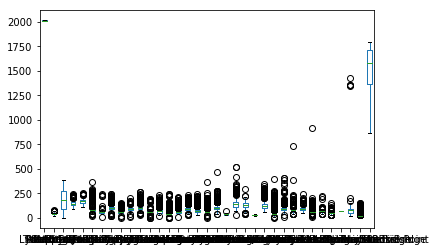

In [34]:
plotty = df2.plot.box()


The race in mins is now saved to a separate csv.

In [35]:
df2.to_csv('../../data/WS_race_in_mins.csv')

# Minutes per kilometre (Pace)

A key aspect of pacing comparison and analysis is finding the 1-kilometre pace in order to get a balanced view of all the stages. I divided each stage by their distance and this gave me the pace per kilometre for each runner. The distances of the stages were found on the wser website  

The formula is as follows: 1km_Stage_Pace = Stage_Time / Stage_Distance

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 40 columns):
Year                                 3021 non-null int64
bib                                  3021 non-null object
name_mask                            3021 non-null object
gender                               3021 non-null object
category                             3021 non-null object
runner_age                           3021 non-null float64
rank                                 2599 non-null float64
nationality                          3021 non-null object
Start to Lyon Ridge                  2454 non-null float64
Start to Talbot Creek                418 non-null float64
Lyon Ridge to Red Star Ridge         2526 non-null float64
Talbot Creek to Poppy Trailhead      392 non-null float64
Red Star Ridge to Duncan Canyon      2478 non-null float64
Poppy Trailhead to Duncan Canyon     413 non-null float64
Duncan Canyon to Mosquito Ridge      364 non-null float64
Duncan Canyon to Ro

In [37]:
df2['Start to Lyon Ridge'] =  df2['Start to Lyon Ridge'] /16.6  
df2['Start to Talbot Creek']  =  df2['Start to Talbot Creek'] /22.7 
df2['Lyon Ridge to Red Star Ridge' ]  =  df2['Lyon Ridge to Red Star Ridge' ] / 8.9     
df2['Talbot Creek to Poppy Trailhead'] =    df2['Talbot Creek to Poppy Trailhead']/ 9    
df2['Red Star Ridge to Duncan Canyon'] =  df2['Red Star Ridge to Duncan Canyon']/ 13.8     
df2['Poppy Trailhead to Duncan Canyon' ] =   df2['Poppy Trailhead to Duncan Canyon' ]  / 6.8       
df2['Duncan Canyon to Mosquito Ridge']  =    df2['Duncan Canyon to Mosquito Ridge'] / 11.6           
df2['Duncan Canyon to Robinson Flat'    ]  = df2['Duncan Canyon to Robinson Flat'    ]  /9.5      
df2['Mosquito Ridge to Millers Defeat'     ]  = df2['Mosquito Ridge to Millers Defeat'     ]   / 7.1   
df2['Robinson Flat to Millers Defeat'    ]  = df2['Robinson Flat to Millers Defeat'    ] / 6.6             
df2['Millers Defeat to Dusty Corners' ]   = df2['Millers Defeat to Dusty Corners' ]  / 5.6          
df2['Dusty Corners to Last Chance']   = df2['Dusty Corners to Last Chance']  / 8.5      
df2['Last Chance to Devils Thumb']   = df2['Last Chance to Devils Thumb'] / 7.2         
df2['Devils Thumb to El Dorado Creek']   = df2['Devils Thumb to El Dorado Creek']  / 8.2      
df2['El Dorado Creek to Michigan Bluff']  = df2['El Dorado Creek to Michigan Bluff']  / 4.5                
df2['Michigan Bluff to Foresthill'] = df2['Michigan Bluff to Foresthill'] / 10.1        
df2['Foresthill to Dardanelles']  = df2['Foresthill to Dardanelles'] /6                   
df2['Foresthill to Peachstone']   = df2['Foresthill to Peachstone']  / 14     
df2['Dardanelles to Peachstone'] = df2['Dardanelles to Peachstone'] / 8               
df2['Peachstone to Fords Bar' ]   = df2['Peachstone to Fords Bar' ] / 3.7       
df2['Peachstone to Rucky Chucky']  = df2['Peachstone to Rucky Chucky']  / 11.7 
#df2['Fords Bar to Rucky Chucky']  = df2['Fords Bar to Rucky Chucky']  / 8 
df2['Rucky Chucky to Green Gate' ]    = df2['Rucky Chucky to Green Gate' ]  / 2.9   
df2['Green Gate to Auburn Lake Trails' ]  = df2['Green Gate to Auburn Lake Trails' ] / 8.7      
df2['Auburn Lake Trails to Browns Bar'  ]   =  df2['Auburn Lake Trails to Browns Bar'  ] / 7.7   
df2['Auburn Lake Trails to Quarry Road' ]   = df2['Auburn Lake Trails to Quarry Road' ]  / 8.9     
df2['Browns Bar to Highway 49']  = df2['Browns Bar to Highway 49']  / 5.4        
df2['Quarry Road to Pointed Rocks']  = df2['Quarry Road to Pointed Rocks']  / 5.8        
df2['Highway 49 to No Hands Bridge' ]   = df2['Highway 49 to No Hands Bridge' ]   /   7.4 
df2['Pointed Rocks to No Hands Bridge' ]   = df2['Pointed Rocks to No Hands Bridge' ]   /   4
df2['No Hands Bridge to Robie Point' ]  = df2['No Hands Bridge to Robie Point' ]   / 3.4           
df2['Robie Point to Finish' ]  = df2['Robie Point to Finish' ]  / 2.1     

In [38]:
df2.describe()

,Year,runner_age,rank,Start to Lyon Ridge,Start to Talbot Creek,Lyon Ridge to Red Star Ridge,Talbot Creek to Poppy Trailhead,Red Star Ridge to Duncan Canyon,Poppy Trailhead to Duncan Canyon,Duncan Canyon to Mosquito Ridge,Duncan Canyon to Robinson Flat,Mosquito Ridge to Millers Defeat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Foresthill to Dardanelles,Foresthill to Peachstone,Dardanelles to Peachstone,Peachstone to Fords Bar,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,time
count,3021.000000,3021.000000,2599.000000,2454.000000,418.000000,2526.000000,392.000000,2478.000000,413.000000,364.000000,2545.000000,355.000000,2424.000000,2736.000000,2712.000000,2787.000000,2397.000000,2718.000000,2612.000000,19.000000,2189.000000,314.000000,21.000000,2095.000000,2390.000000,2368.000000,1766.000000,548.000000,1774.000000,546.000000,606.000000,1.00,2223.000000,2284.000000,2293.000000
mean,2014.271102,42.494207,186.618699,8.584846,7.492043,9.488179,6.532596,7.309699,8.796112,8.208839,10.644106,9.128076,10.302780,8.105334,7.568107,12.836533,9.285438,16.295400,10.130733,6.398392,9.912728,16.420143,8.030888,10.702374,21.247150,10.791010,10.266574,10.218158,12.325990,11.966980,7.484167,18.25,22.866231,10.560525,1521.344992
std,2.536813,9.312086,107.537510,1.373065,1.175051,4.072548,2.283126,1.614493,2.805335,1.897075,2.568890,3.070678,2.962101,3.331641,2.029792,3.239623,2.640230,6.792416,2.514075,1.425144,2.638594,4.274313,0.952268,2.999696,16.401575,2.904674,3.285569,2.361795,4.658369,2.588198,1.740931,NaN,19.746626,7.493410,222.884408
min,2010.000000,20.000000,1.000000,5.542169,5.110132,2.591760,0.777778,1.159420,0.588235,0.948276,3.263158,0.422535,2.575758,0.000000,0.941176,3.888889,4.146341,0.666667,3.762376,4.666667,1.928571,4.750000,6.216216,4.871795,0.000000,1.494253,4.805195,5.280899,1.851852,6.729885,3.513514,18.25,6.176471,4.023810,870.066667
25%,2012.000000,36.000000,94.000000,7.650602,6.828194,7.742509,5.555556,6.348430,7.205882,6.982759,9.157895,7.887324,8.333333,6.607143,6.352941,10.833333,7.560976,12.666667,8.514851,5.416667,8.000000,14.000000,7.567568,8.547009,12.758621,9.080460,8.831169,8.876404,10.925926,10.689655,6.621622,18.25,13.872549,7.809524,1371.450000
50%,2014.000000,42.000000,187.000000,8.614458,7.577093,8.719101,6.444444,7.173913,8.529412,8.017241,10.421053,9.014085,10.000000,7.678571,7.411765,12.638889,9.146341,14.222222,9.900990,6.000000,9.928571,16.437500,8.108108,10.683761,15.172414,10.689655,10.000000,9.887640,12.037037,11.896552,7.432432,18.25,23.235294,9.015873,1579.350000
75%,2016.000000,49.000000,279.000000,9.503765,8.193833,9.775281,7.111111,8.115942,9.411765,8.965517,11.684211,9.859155,11.666667,8.750000,8.382353,14.305556,10.365854,16.444444,11.422030,6.916667,11.428571,19.375000,8.648649,12.136752,18.965517,11.954023,11.298701,11.348315,13.164352,12.758621,8.378378,18.25,27.941176,10.674603,1719.283333
max,2018.000000,77.000000,383.000000,14.457831,11.057269,40.674157,27.333333,18.043478,22.058824,17.241379,28.315789,27.746479,34.848485,44.285714,25.411765,32.361111,29.268293,80.888889,46.336634,11.166667,36.877381,37.250000,9.729730,29.316239,135.517241,46.666667,94.805195,26.966292,170.185185,38.965517,20.810811,18.25,419.117647,73.492063,1799.900000


I decided then to eliminate any times under 2.2 minutes, as this would be world record pace. Times this low would not make sense in a race like this so I deleted any rows with this. 

In [39]:
df2 = df2[df2 > 2.2]  

In [40]:
pd.set_option('display.max_columns', None)
df2.describe()

,Year,runner_age,rank,Start to Lyon Ridge,Start to Talbot Creek,Lyon Ridge to Red Star Ridge,Talbot Creek to Poppy Trailhead,Red Star Ridge to Duncan Canyon,Poppy Trailhead to Duncan Canyon,Duncan Canyon to Mosquito Ridge,Duncan Canyon to Robinson Flat,Mosquito Ridge to Millers Defeat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Foresthill to Dardanelles,Foresthill to Peachstone,Dardanelles to Peachstone,Peachstone to Fords Bar,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,time
count,3021.000000,3021.000000,2585.000000,2454.000000,418.000000,2526.000000,391.000000,2475.000000,411.000000,362.000000,2545.000000,351.000000,2424.000000,2731.000000,2711.000000,2787.000000,2397.000000,2717.000000,2612.000000,19.000000,2188.000000,314.000000,21.000000,2095.000000,2388.000000,2367.000000,1766.000000,548.000000,1773.000000,546.000000,606.000000,1.00,2223.000000,2284.000000,2293.000000
mean,2014.271102,42.494207,187.621277,8.584846,7.492043,9.488179,6.547315,7.316978,8.833190,8.246571,10.644106,9.222871,10.302780,8.118800,7.570551,12.836533,9.285438,16.301152,10.130733,6.398392,9.916377,16.420143,8.030888,10.702374,21.264223,10.794937,10.266574,10.218158,12.331897,11.966980,7.484167,18.25,22.866231,10.560525,1521.344992
std,2.536813,9.312086,106.959322,1.373065,1.175051,4.072548,2.267354,1.601857,2.760800,1.832476,2.568890,2.955342,2.962101,3.319614,2.026170,3.239623,2.640230,6.787042,2.514075,1.425144,2.633666,4.274313,0.952268,2.999696,16.397803,2.898991,3.285569,2.361795,4.653031,2.588198,1.740931,NaN,19.746626,7.493410,222.884408
min,2010.000000,20.000000,3.000000,5.542169,5.110132,2.591760,4.333333,2.463768,2.647059,3.879310,3.263158,2.253521,2.575758,3.750000,4.117647,3.888889,4.146341,2.222222,3.762376,4.666667,4.714286,4.750000,6.216216,4.871795,2.758621,3.908046,4.805195,5.280899,3.888889,6.729885,3.513514,18.25,6.176471,4.023810,870.066667
25%,2012.000000,36.000000,95.000000,7.650602,6.828194,7.742509,5.555556,6.352657,7.205882,6.982759,9.157895,7.887324,8.333333,6.607143,6.352941,10.833333,7.560976,12.666667,8.514851,5.416667,8.000000,14.000000,7.567568,8.547009,12.758621,9.080460,8.831169,8.876404,10.925926,10.689655,6.621622,18.25,13.872549,7.809524,1371.450000
50%,2014.000000,42.000000,188.000000,8.614458,7.577093,8.719101,6.444444,7.173913,8.529412,8.017241,10.421053,9.014085,10.000000,7.678571,7.411765,12.638889,9.146341,14.222222,9.900990,6.000000,9.928571,16.437500,8.108108,10.683761,15.172414,10.689655,10.000000,9.887640,12.037037,11.896552,7.432432,18.25,23.235294,9.015873,1579.350000
75%,2016.000000,49.000000,280.000000,9.503765,8.193833,9.775281,7.111111,8.115942,9.411765,8.965517,11.684211,9.859155,11.666667,8.750000,8.411765,14.305556,10.365854,16.444444,11.422030,6.916667,11.428571,19.375000,8.648649,12.136752,18.965517,11.954023,11.298701,11.348315,13.169753,12.758621,8.378378,18.25,27.941176,10.674603,1719.283333
max,2018.000000,77.000000,383.000000,14.457831,11.057269,40.674157,27.333333,18.043478,22.058824,17.241379,28.315789,27.746479,34.848485,44.285714,25.411765,32.361111,29.268293,80.888889,46.336634,11.166667,36.877381,37.250000,9.729730,29.316239,135.517241,46.666667,94.805195,26.966292,170.185185,38.965517,20.810811,18.25,419.117647,73.492063,1799.900000


## Average Pace

Finding the average pace of each runner gives a good indication on how difficult a race is. It is perhaps a better indictor than finish times due to the inconsistency of the race stage sequences. 

In [41]:
df2['AVG_Pace'] = df2.filter(like='to').mean(axis = 1)

In [42]:
df2.head()

,Year,bib,name_mask,gender,category,runner_age,rank,nationality,Start to Lyon Ridge,Start to Talbot Creek,Lyon Ridge to Red Star Ridge,Talbot Creek to Poppy Trailhead,Red Star Ridge to Duncan Canyon,Poppy Trailhead to Duncan Canyon,Duncan Canyon to Mosquito Ridge,Duncan Canyon to Robinson Flat,Mosquito Ridge to Millers Defeat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Foresthill to Dardanelles,Foresthill to Peachstone,Dardanelles to Peachstone,Peachstone to Fords Bar,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,time,AVG_Pace
0,2018,20,7479fb90beffad048c5f772ba1915b4e,Male,Senior Men (23-39),28.0,NaN,USA,6.265060,NaN,5.393258,NaN,4.347826,NaN,NaN,5.894737,NaN,4.545455,4.464286,4.705882,6.805556,5.243902,6.888889,5.247525,4.666667,NaN,4.75,6.216216,NaN,19.655172,5.862069,NaN,5.280899,NaN,6.729885,NaN,NaN,11.083333,4.928571,870.066667,6.448759
1,2018,13,343c649718c8ed904090cbcb05ca97b1,Male,Senior Men (23-39),32.0,NaN,FRA,6.204819,NaN,5.842697,NaN,4.782609,NaN,NaN,6.105263,NaN,4.696970,4.821429,4.705882,6.944444,4.878049,8.444444,6.138614,5.833333,NaN,5.50,6.486486,NaN,23.103448,6.321839,NaN,5.842697,NaN,7.931034,NaN,NaN,14.838235,6.873016,954.883333,7.314765
2,2018,M3,275e1385c00219e79ea54c8d6381fc07,Male,Senior Men (23-39),33.0,3.0,USA,6.325301,NaN,6.067416,NaN,4.927536,NaN,NaN,6.631579,NaN,5.454545,NaN,8.000000,7.361111,5.000000,8.666667,5.742574,5.333333,NaN,5.75,7.027027,NaN,22.758621,6.206897,NaN,5.842697,NaN,7.586207,NaN,NaN,14.632353,6.777778,968.983333,7.689034
3,2018,M7,9a22e0603cd00f47e015963c32d6f964,Male,Senior Men (23-39),37.0,4.0,USA,6.385542,NaN,6.179775,NaN,4.927536,NaN,NaN,6.736842,NaN,5.000000,NaN,8.000000,7.638889,5.121951,9.111111,6.336634,5.333333,NaN,5.75,7.027027,NaN,23.793103,6.321839,NaN,6.067416,NaN,7.758621,NaN,NaN,13.906863,6.309524,983.533333,7.774000
4,2018,M10,0d274b89ac57a27941405195d37bf2c3,Male,Senior Men (23-39),31.0,6.0,USA,6.566265,NaN,6.292135,NaN,5.000000,NaN,NaN,6.947368,NaN,5.000000,5.178571,5.176471,8.750000,5.000000,10.666667,6.790429,5.569444,NaN,6.25,7.837838,NaN,24.827586,6.436782,NaN,5.617978,NaN,7.931034,NaN,NaN,12.455882,4.301587,1014.383333,7.629802


## Gender Pacing

Having analysed the participation rates, the next step was to find out how this reflected their performance. To begin, I examined the average pace for males and females, and found that males were marginally faster on average. 

In [43]:
df2.groupby(['gender'])['AVG_Pace'].mean()


gender
Female    11.644911
Male      11.368783
Name: AVG_Pace, dtype: float64

Text(0.5,0,'Gender')

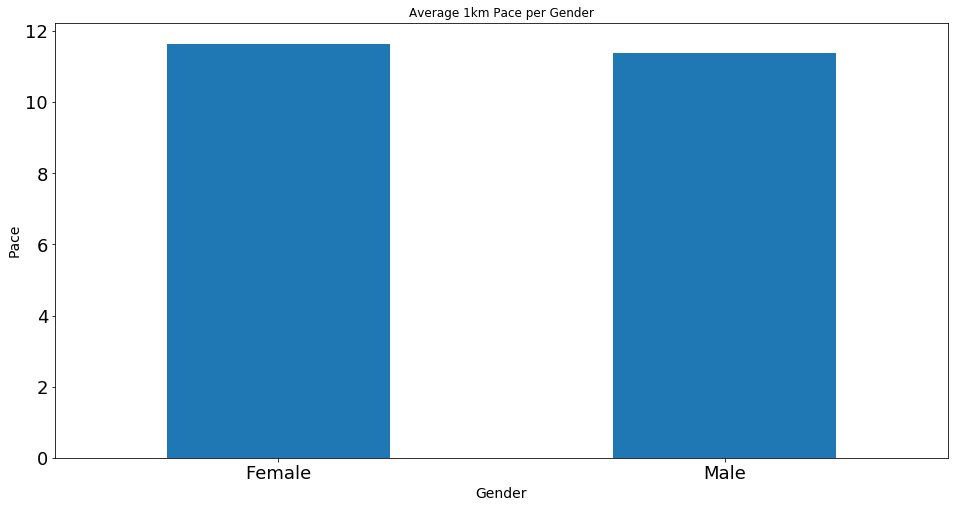

In [44]:
gen = df2.groupby(['gender'])['AVG_Pace'].mean()
ax = gen.plot.bar(figsize=(16, 8), title='Average 1km Pace per Gender', fontsize=18, rot=0)
ax.set_ylabel('Pace', fontsize = 14)
ax.set_xlabel('Gender', fontsize = 14)

I examined this further, year by year. 

In [45]:
df2.groupby(['Year', 'gender'])['AVG_Pace'].mean().unstack()

gender,Female,Male
Year,,
2010,11.696115,11.420167
2012,9.758229,10.007522
2013,11.430355,11.444472
2014,10.674361,10.489040
2015,11.346947,11.079308
2016,12.885530,12.245334
2017,11.203592,10.969940
2018,13.894063,13.445596


Text(0.5,0,'Gender')

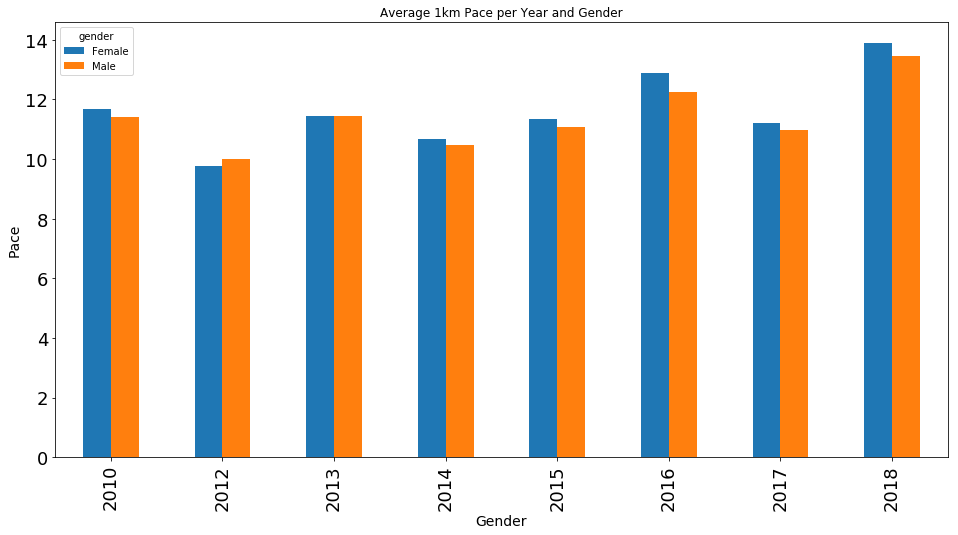

In [46]:
gen = df2.groupby(['Year', 'gender'])['AVG_Pace'].mean().unstack()
ax = gen.plot.bar(figsize=(16, 8), title='Average 1km Pace per Year and Gender', fontsize=18)
ax.set_ylabel('Pace', fontsize = 14)
ax.set_xlabel('Gender', fontsize = 14)

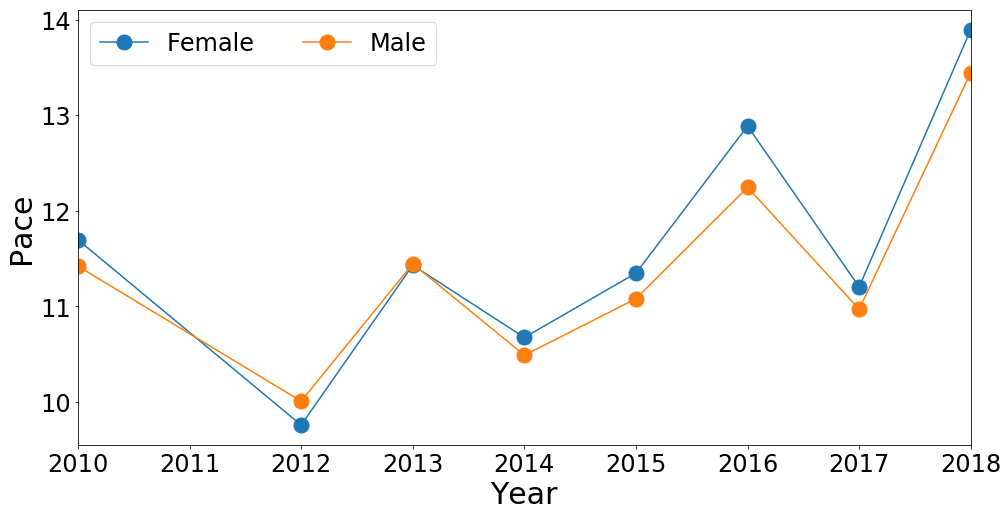

In [49]:
gen = df2.groupby(['Year', 'gender'])['AVG_Pace'].mean().unstack()
ax = gen.plot(figsize=(16, 8), fontsize=24, marker='o', ms=15)
ax.set_ylabel('Pace', fontsize = 30)
ax.set_xlabel('Year', fontsize = 30)
ax.legend(['Female', 'Male'], frameon=True, ncol=2, loc='upper left', fontsize = 24)

The first thing to note when comparing the pace of the UTMB with that of the Western States,
is how much faster the Western States is ran on average. The UTMB is ran over 14 minutes
per kilometre every year on average, whereas the max minutes per kilometre average pace of the
Western states is still less than that. This is peculiar as both races are ran over 170 kilometres.
Another interesting factor is how similar the average pace of males and females is for the Western
States. Indeed, females run a faster average pace in 2012 and 2013. The trend is matched year
on year, which shows there are no particular years when one gender finds it more challenging than
the other.


I also found the average pace per segment for each gender

In [231]:
df3 = df2.drop(['Year', 'bib', 'rank'], axis = 1)
df3.groupby(['gender']).mean()


,runner_age,Start to Lyon Ridge,Start to Talbot Creek,Lyon Ridge to Red Star Ridge,Talbot Creek to Poppy Trailhead,Red Star Ridge to Duncan Canyon,Poppy Trailhead to Duncan Canyon,Duncan Canyon to Mosquito Ridge,Duncan Canyon to Robinson Flat,Mosquito Ridge to Millers Defeat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Foresthill to Dardanelles,Foresthill to Peachstone,Dardanelles to Peachstone,Peachstone to Fords Bar,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,time,AVG_Pace
gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,41.115016,8.966004,8.046126,10.471765,7.050136,7.656390,9.362155,8.245273,10.895042,8.882629,10.456085,8.271814,7.723957,12.879932,9.359360,16.758751,10.168099,6.716667,10.138034,16.136194,8.722359,10.834772,20.981205,10.772114,10.236128,10.268014,12.226997,12.217433,7.277992,NaN,24.281226,10.215378,1542.143888,11.644911
Male,42.854697,8.488779,7.350611,9.236291,6.413880,7.229971,8.699336,8.246839,10.580135,9.293024,10.263740,8.081349,7.532659,12.825814,9.267788,16.187908,10.121579,6.044753,9.862161,16.497166,7.270270,10.669963,21.332843,10.800443,10.273860,10.205779,12.356786,11.905225,7.527378,18.25,22.529816,10.641955,1516.420119,11.368783


## Category pacing

The average pace of each category was also investigated.

Text(0.5,0.98,'Average 1km pace per Category')

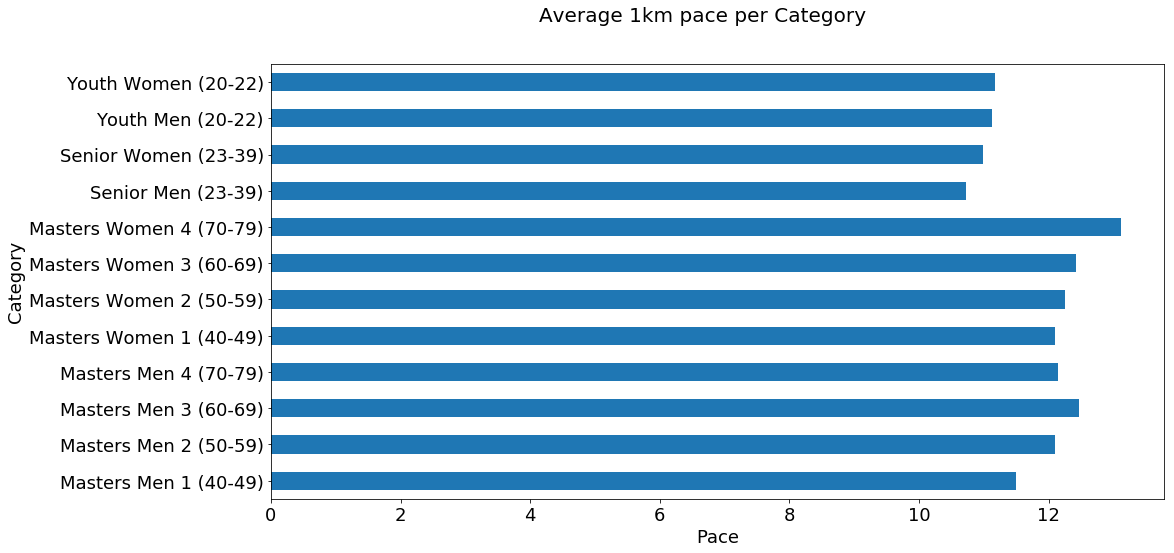

In [232]:
fig = plt.figure()
cate = df2.groupby(['category'])['AVG_Pace'].mean()
ax = cate.plot.barh(figsize=(16, 8), fontsize=18)
ax.set_ylabel('Category', fontsize = 18)
ax.set_xlabel('Pace', fontsize = 18)
fig.suptitle('Average 1km pace per Category', fontsize=20)

In [233]:
df2.groupby(['Year', 'category'])['AVG_Pace'].mean().unstack()

category,Masters Men 1 (40-49),Masters Men 2 (50-59),Masters Men 3 (60-69),Masters Men 4 (70-79),Masters Women 1 (40-49),Masters Women 2 (50-59),Masters Women 3 (60-69),Masters Women 4 (70-79),Senior Men (23-39),Senior Women (23-39),Youth Men (20-22),Youth Women (20-22)
Year,,,,,,,,,,,,
2010,11.434586,12.112677,12.280391,11.801555,11.832428,12.248650,NaN,NaN,10.905107,11.252207,10.648664,12.433240
2012,10.188775,10.880361,11.110441,11.356570,9.927300,10.937052,11.218101,NaN,9.301064,9.249235,NaN,NaN
2013,11.692499,11.567052,12.792228,10.174442,11.669507,11.609160,13.831396,NaN,11.003416,11.019359,12.259771,NaN
2014,10.359324,11.286263,12.505997,NaN,11.283598,10.418163,NaN,NaN,9.941099,10.235445,12.075848,NaN
2015,11.331830,11.970615,11.762024,13.197591,11.697971,11.166949,11.365131,12.320151,10.308461,10.889752,6.510312,12.379519
2016,12.507630,13.061146,13.542405,13.317268,12.979734,14.043370,NaN,15.610393,11.375690,12.068484,7.107213,NaN
2017,11.098853,11.436619,11.719689,11.513515,11.046756,13.115325,11.988784,11.424839,10.528465,10.543039,9.218540,NaN
2018,13.730353,14.418644,14.338992,12.486294,15.971469,13.867528,11.662668,NaN,12.606351,12.622478,14.988612,8.721931


In [234]:
groups = df2.groupby(['Year', 'category'])['AVG_Pace'].mean().unstack()

In [235]:
Males = groups.filter(like = 'Men')

In [236]:
Females = groups.filter(like='Women')

Text(0.5,0.98,'Average 1km pace per Category')

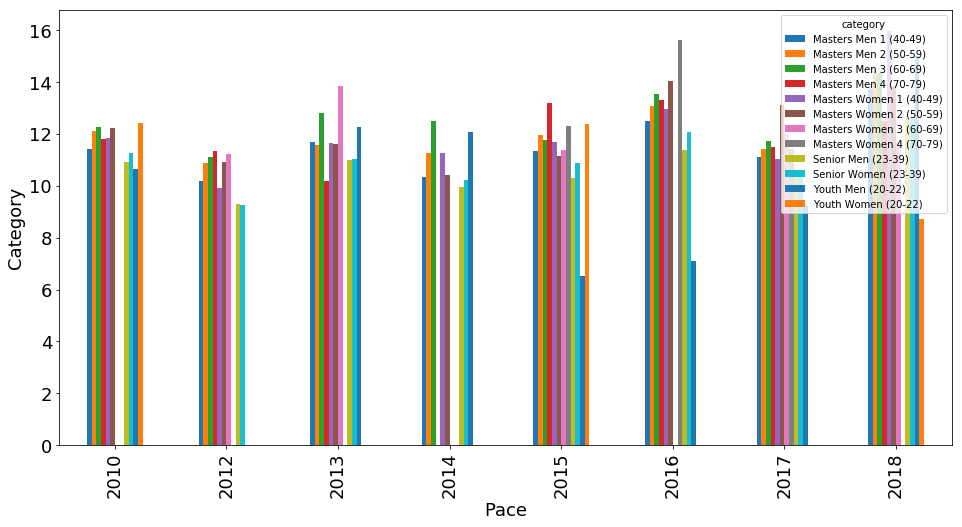

In [237]:
fig = plt.figure()
cate = df2.groupby(['Year','category'])['AVG_Pace'].mean().unstack()
ax = cate.plot.bar(figsize=(16, 8), fontsize=18)
ax.set_ylabel('Category', fontsize = 18)
ax.set_xlabel('Pace', fontsize = 18)
fig.suptitle('Average 1km pace per Category', fontsize=20)

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\matplotlib\legend.py:326: UserWarning: Unrecognized location "upper centre". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


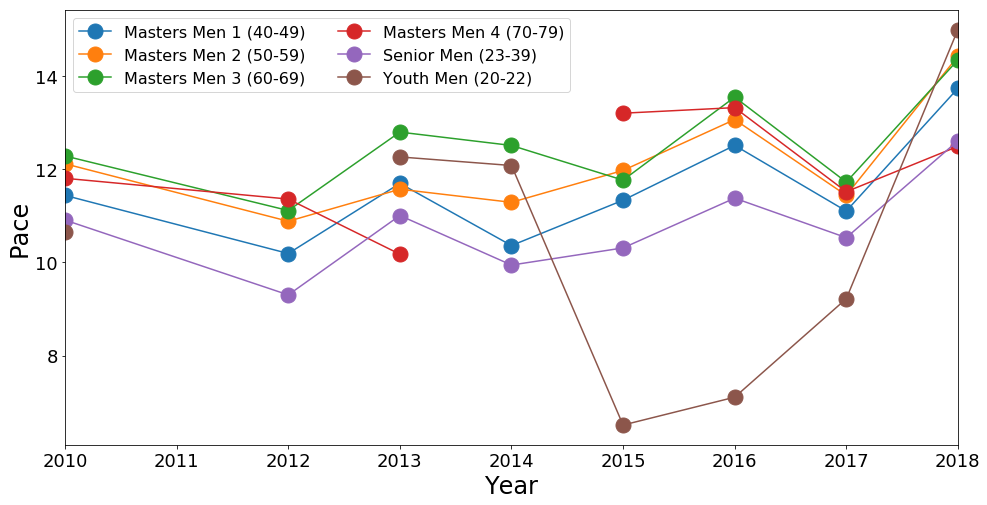

In [238]:
cate = df2.groupby(['Year', 'category'])['AVG_Pace'].mean().unstack()
ax = Males.plot(figsize=(16, 8), fontsize=18, marker='o', ms=15)
ax.set_ylabel('Pace', fontsize = 24)
ax.set_xlabel('Year', fontsize = 24)
ax.legend( frameon=True, ncol=2, loc='upper centre', fontsize=16)

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\matplotlib\legend.py:326: UserWarning: Unrecognized location "upper centre". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


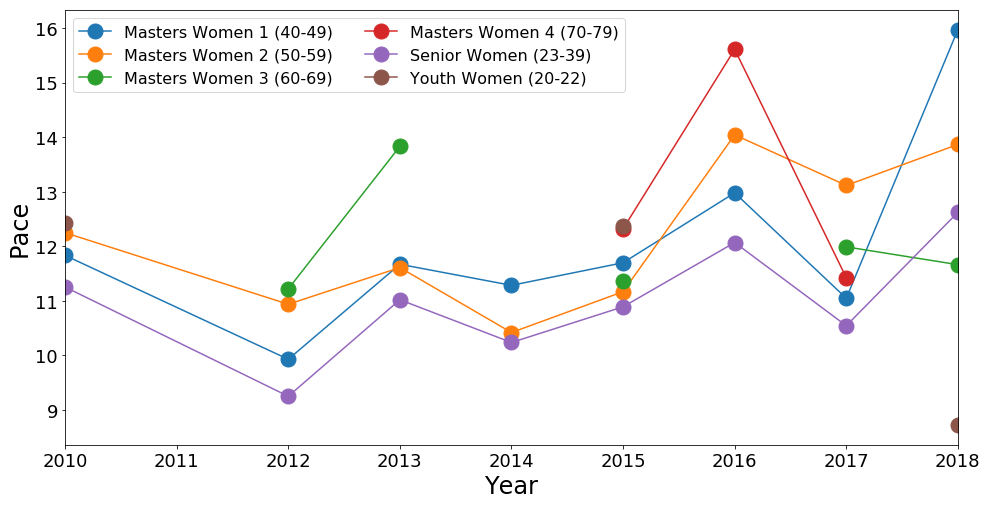

In [239]:
cate = df2.groupby(['Year', 'category'])['AVG_Pace'].mean().unstack()
ax = Females.plot(figsize=(16, 8), fontsize=18, marker='o', ms=15)
ax.set_ylabel('Pace', fontsize = 24)
ax.set_xlabel('Year', fontsize = 24)
ax.legend( frameon=True, ncol=2, loc='upper centre', fontsize=16)

Therefore, the optimum age for both Males and Females for the UTMB is between the ages of 23 and 39. 

I also found the average pace per segment for each category

In [240]:
df3.groupby(['category']).mean()

,runner_age,Start to Lyon Ridge,Start to Talbot Creek,Lyon Ridge to Red Star Ridge,Talbot Creek to Poppy Trailhead,Red Star Ridge to Duncan Canyon,Poppy Trailhead to Duncan Canyon,Duncan Canyon to Mosquito Ridge,Duncan Canyon to Robinson Flat,Mosquito Ridge to Millers Defeat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Foresthill to Dardanelles,Foresthill to Peachstone,Dardanelles to Peachstone,Peachstone to Fords Bar,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,time,AVG_Pace
category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Masters Men 1 (40-49),44.117899,8.603583,7.395465,9.370058,6.514141,7.304984,9.021256,8.471575,10.730017,9.368805,10.288857,8.199405,7.642882,13.034738,9.363522,16.387272,10.198355,5.166667,10.038011,16.912500,7.837838,10.736205,21.435572,10.804446,10.409103,10.205675,12.852915,11.856838,7.623008,NaN,22.550819,10.790796,1537.823039,11.501726
Masters Men 2 (50-59),53.523596,9.106390,7.795292,9.991750,6.944444,7.875038,9.480699,8.999641,11.431856,10.395565,11.107554,8.782143,8.053721,13.709050,9.775950,17.103148,10.780729,NaN,10.795299,18.277778,NaN,11.526053,22.784509,11.564554,10.828446,10.364784,12.581534,12.139388,7.711833,18.25,25.650219,11.321875,1617.507188,12.102905
Masters Men 3 (60-69),63.000000,9.601692,8.440529,10.909003,7.111111,8.207745,9.830882,9.545977,11.813864,9.976526,12.001181,9.177741,8.907754,14.120370,10.379038,18.391242,11.395893,NaN,11.297584,18.765625,NaN,11.899958,24.433498,11.878489,11.347403,10.758427,13.064643,12.528736,8.529412,NaN,24.457701,12.085765,1707.304839,12.469543
Masters Men 4 (70-79),72.933333,11.141475,9.486050,12.581929,8.555556,9.142402,10.245098,11.120690,12.765550,10.070423,13.203463,9.583333,9.235294,15.972222,10.975610,20.266667,12.174917,NaN,12.270833,20.625000,NaN,12.863248,24.827586,12.643678,13.311688,10.224719,12.962963,12.068966,NaN,NaN,24.166667,10.174603,1749.700000,12.137957
Masters Women 1 (40-49),44.093617,9.103098,8.171806,10.785115,7.160494,7.811453,9.705882,8.583208,11.185146,9.257362,10.934757,8.931197,7.948924,13.310185,9.703833,17.053098,10.392680,NaN,10.396726,17.817708,NaN,11.069908,22.589955,11.201213,10.278427,10.956575,12.390887,12.744641,7.554384,NaN,27.860458,10.984454,1590.519089,12.097345
Masters Women 2 (50-59),53.076923,9.796022,8.837004,11.721856,7.357143,8.257835,10.450980,9.784483,11.603639,12.230047,11.668742,8.826190,8.311039,13.740741,10.359321,19.190123,10.680497,NaN,10.716667,16.843750,NaN,11.146215,18.472906,11.115987,10.878696,11.435705,11.978328,12.090517,7.128378,NaN,24.517817,9.453449,1612.701603,12.254524
Masters Women 3 (60-69),62.375000,10.094664,NaN,12.893258,NaN,8.686594,NaN,9.913793,12.180451,9.718310,10.393939,9.428571,9.341176,11.416667,11.658537,14.600000,10.778218,NaN,11.414286,14.500000,NaN,12.521368,23.620690,10.833333,10.714286,9.213483,13.148148,11.551724,9.594595,NaN,20.444853,9.519841,1661.504167,12.423943
Masters Women 4 (70-79),71.000000,10.907129,NaN,17.226592,NaN,9.660225,NaN,NaN,12.210526,NaN,11.818182,9.464286,9.235294,14.583333,10.975610,26.222222,11.342409,NaN,11.495833,NaN,NaN,12.350427,14.482759,16.091954,10.779221,NaN,11.851852,NaN,NaN,NaN,27.970588,8.000000,1799.900000,13.118461
Senior Men (23-39),33.691525,7.915191,6.877059,8.500841,5.927536,6.706234,7.709904,7.550751,9.821835,8.721215,9.612911,7.476752,7.022219,12.030651,8.804223,15.338635,9.598812,6.154514,9.101771,15.008929,7.207207,10.094325,20.270836,10.311261,9.757996,10.119504,11.698721,11.831805,7.296663,NaN,21.002847,10.034704,1436.567694,10.723669


In [241]:
df2.head()

,Year,bib,name_mask,gender,category,runner_age,rank,nationality,Start to Lyon Ridge,Start to Talbot Creek,Lyon Ridge to Red Star Ridge,Talbot Creek to Poppy Trailhead,Red Star Ridge to Duncan Canyon,Poppy Trailhead to Duncan Canyon,Duncan Canyon to Mosquito Ridge,Duncan Canyon to Robinson Flat,Mosquito Ridge to Millers Defeat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Foresthill to Dardanelles,Foresthill to Peachstone,Dardanelles to Peachstone,Peachstone to Fords Bar,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,time,AVG_Pace
0,2018,20,7479fb90beffad048c5f772ba1915b4e,Male,Senior Men (23-39),28.0,NaN,USA,6.265060,NaN,5.393258,NaN,4.347826,NaN,NaN,5.894737,NaN,4.545455,4.464286,4.705882,6.805556,5.243902,6.888889,5.247525,4.666667,NaN,4.75,6.216216,NaN,19.655172,5.862069,NaN,5.280899,NaN,6.729885,NaN,NaN,11.083333,4.928571,870.066667,6.448759
1,2018,13,343c649718c8ed904090cbcb05ca97b1,Male,Senior Men (23-39),32.0,NaN,FRA,6.204819,NaN,5.842697,NaN,4.782609,NaN,NaN,6.105263,NaN,4.696970,4.821429,4.705882,6.944444,4.878049,8.444444,6.138614,5.833333,NaN,5.50,6.486486,NaN,23.103448,6.321839,NaN,5.842697,NaN,7.931034,NaN,NaN,14.838235,6.873016,954.883333,7.314765
2,2018,M3,275e1385c00219e79ea54c8d6381fc07,Male,Senior Men (23-39),33.0,3.0,USA,6.325301,NaN,6.067416,NaN,4.927536,NaN,NaN,6.631579,NaN,5.454545,NaN,8.000000,7.361111,5.000000,8.666667,5.742574,5.333333,NaN,5.75,7.027027,NaN,22.758621,6.206897,NaN,5.842697,NaN,7.586207,NaN,NaN,14.632353,6.777778,968.983333,7.689034
3,2018,M7,9a22e0603cd00f47e015963c32d6f964,Male,Senior Men (23-39),37.0,4.0,USA,6.385542,NaN,6.179775,NaN,4.927536,NaN,NaN,6.736842,NaN,5.000000,NaN,8.000000,7.638889,5.121951,9.111111,6.336634,5.333333,NaN,5.75,7.027027,NaN,23.793103,6.321839,NaN,6.067416,NaN,7.758621,NaN,NaN,13.906863,6.309524,983.533333,7.774000
4,2018,M10,0d274b89ac57a27941405195d37bf2c3,Male,Senior Men (23-39),31.0,6.0,USA,6.566265,NaN,6.292135,NaN,5.000000,NaN,NaN,6.947368,NaN,5.000000,5.178571,5.176471,8.750000,5.000000,10.666667,6.790429,5.569444,NaN,6.25,7.837838,NaN,24.827586,6.436782,NaN,5.617978,NaN,7.931034,NaN,NaN,12.455882,4.301587,1014.383333,7.629802


I save the dataframe containing the 1km split times into a new csv file. This Pacing information will be crucial for future notebooks. 

In [242]:
df2.to_csv('../../data/WS_1km_splits_full.csv')